In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pymc3 as pm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import theano
import scipy.stats as stats
import scipy
import seaborn as sns
import pickle
sns.set(color_codes=True)

from bayesian import CLRM, Result

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Set logging
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('bayesian_glm')

plt.style.use('fivethirtyeight')
%matplotlib inline

files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]

## Training Data

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


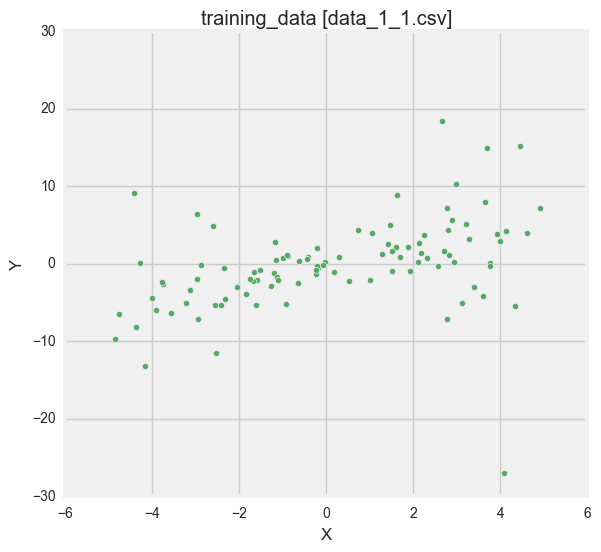

In [5]:
CLRM(files[0], lambda w, x: w).plot_input_data()

## Inference

### Homoskedastic

In [37]:
results_constant = []
for f in files:
    clrm = CLRM(f, lambda w, x: w)
    clrm.fit_linear_model(10000)
    results_constant.append(clrm)

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
INFO:CLRM:Fitting linear model for filename data_1_1.csv


Optimization terminated successfully.
         Current function value: 297.473471
         Iterations: 6
         Function evaluations: 284
('MAP Estimate', {'a': array(1.0372171567210353), 'nu_interval_': array(-1.042206022987242), 'b': array(0.014970736429343), 'w_interval_': array(-3.6578928136572246)})


100%|██████████| 10000/10000 [00:03<00:00, 2654.61it/s]
INFO:CLRM:Time taken = 8.68895792961
INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
INFO:CLRM:Fitting linear model for filename data_1_2.csv


Optimization terminated successfully.
         Current function value: 391.462842
         Iterations: 6
         Function evaluations: 300
('MAP Estimate', {'a': array(1.2417454092760583), 'nu_interval_': array(-1.653476156908777), 'b': array(-0.4634358881199373), 'w_interval_': array(-4.17271092000646)})


100%|██████████| 10000/10000 [00:03<00:00, 2609.41it/s]
INFO:CLRM:Time taken = 11.285763979
INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of X is (50,)
INFO:CLRM:shape of Y is (50,)
INFO:CLRM:Fitting linear model for filename data_1_3.csv


Optimization terminated successfully.
         Current function value: 213.342269
         Iterations: 7
         Function evaluations: 335
('MAP Estimate', {'a': array(-0.6689536366950428), 'nu_interval_': array(-1.4445598278448208), 'b': array(0.02699208689549034), 'w_interval_': array(-4.189642195968285)})


100%|██████████| 10000/10000 [00:03<00:00, 2616.83it/s]
INFO:CLRM:Time taken = 8.99207997322
INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of X is (50,)
INFO:CLRM:shape of Y is (50,)
INFO:CLRM:Fitting linear model for filename data_1_4.csv


Optimization terminated successfully.
         Current function value: 162.740446
         Iterations: 8
         Function evaluations: 380
('MAP Estimate', {'a': array(0.9952969412418115), 'nu_interval_': array(0.131597127532673), 'b': array(0.533700874803425), 'w_interval_': array(-3.956320347676987)})


100%|██████████| 10000/10000 [00:03<00:00, 2968.35it/s]
INFO:CLRM:Time taken = 8.14867711067
INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of X is (50,)
INFO:CLRM:shape of Y is (50,)
INFO:CLRM:Fitting linear model for filename data_1_5.csv


Optimization terminated successfully.
         Current function value: 190.998811
         Iterations: 7
         Function evaluations: 353
('MAP Estimate', {'a': array(-0.9751697962392275), 'nu_interval_': array(-1.342482833871495), 'b': array(-0.2369260511982848), 'w_interval_': array(-3.864962496887643)})


100%|██████████| 10000/10000 [00:03<00:00, 2941.59it/s]
INFO:CLRM:Time taken = 8.09004998207


### Heteroskedastic

In [38]:
results_square = []
for f in files:
    clrm = CLRM(f, lambda w, x: w/np.pow(x, 2))
    clrm.fit_linear_model(10000)
    results_square.append(clrm)

INFO:CLRM:reading file data_1_1.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
INFO:CLRM:Fitting linear model for filename data_1_1.csv


Optimization terminated successfully.
         Current function value: 297.473471
         Iterations: 6
         Function evaluations: 284
('MAP Estimate', {'a': array(1.0372171567210353), 'nu_interval_': array(-1.042206022987242), 'b': array(0.014970736429343), 'w_interval_': array(-3.6578928136572246)})


100%|██████████| 10000/10000 [00:04<00:00, 2218.85it/s]
INFO:CLRM:Time taken = 12.7257819176
INFO:CLRM:reading file data_1_2.csv
INFO:CLRM:shape of X is (100,)
INFO:CLRM:shape of Y is (100,)
INFO:CLRM:Fitting linear model for filename data_1_2.csv


Optimization terminated successfully.
         Current function value: 391.462842
         Iterations: 6
         Function evaluations: 300
('MAP Estimate', {'a': array(1.2417454092760583), 'nu_interval_': array(-1.653476156908777), 'b': array(-0.4634358881199373), 'w_interval_': array(-4.17271092000646)})


100%|██████████| 10000/10000 [00:04<00:00, 2454.44it/s]
INFO:CLRM:Time taken = 9.41733503342
INFO:CLRM:reading file data_1_3.csv
INFO:CLRM:shape of X is (50,)
INFO:CLRM:shape of Y is (50,)
INFO:CLRM:Fitting linear model for filename data_1_3.csv


Optimization terminated successfully.
         Current function value: 213.342269
         Iterations: 7
         Function evaluations: 335
('MAP Estimate', {'a': array(-0.6689536366950428), 'nu_interval_': array(-1.4445598278448208), 'b': array(0.02699208689549034), 'w_interval_': array(-4.189642195968285)})


100%|██████████| 10000/10000 [00:03<00:00, 2786.03it/s]
INFO:CLRM:Time taken = 9.0346660614
INFO:CLRM:reading file data_1_4.csv
INFO:CLRM:shape of X is (50,)
INFO:CLRM:shape of Y is (50,)
INFO:CLRM:Fitting linear model for filename data_1_4.csv


Optimization terminated successfully.
         Current function value: 162.740446
         Iterations: 8
         Function evaluations: 380
('MAP Estimate', {'a': array(0.9952969412418115), 'nu_interval_': array(0.131597127532673), 'b': array(0.533700874803425), 'w_interval_': array(-3.956320347676987)})


100%|██████████| 10000/10000 [00:03<00:00, 2845.78it/s]
INFO:CLRM:Time taken = 8.61424183846
INFO:CLRM:reading file data_1_5.csv
INFO:CLRM:shape of X is (50,)
INFO:CLRM:shape of Y is (50,)
INFO:CLRM:Fitting linear model for filename data_1_5.csv


Optimization terminated successfully.
         Current function value: 190.998811
         Iterations: 7
         Function evaluations: 353
('MAP Estimate', {'a': array(-0.9751697962392275), 'nu_interval_': array(-1.342482833871495), 'b': array(-0.2369260511982848), 'w_interval_': array(-3.864962496887643)})


100%|██████████| 10000/10000 [00:03<00:00, 3121.46it/s]
INFO:CLRM:Time taken = 8.20214009285


## Posterior Predictive Check

In [73]:
results_stats = {'$x^2$': {}, '$1$': {}}

for item in results_constant:
    results_stats['$1$'][item.file_name] = {'rmsd': item.rmsd()}    

for item in results_square:
    results_stats['$x^2$'][item.file_name] = {'rmsd': item.rmsd()}

metrics = []
for k, v in results_stats.items():
    for f, stat in v.items():
            metrics.append({'model': k, 'file_name': f, 'rmsd': stat['rmsd']})    

for m in metrics:
    if m['file_name'] in ['data_1_1.csv', 'data_1_2.csv']:
        m['ct'] = 100
    else:
        m['ct'] = 50

/Users/shashank/.virtualenvs/vvf/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


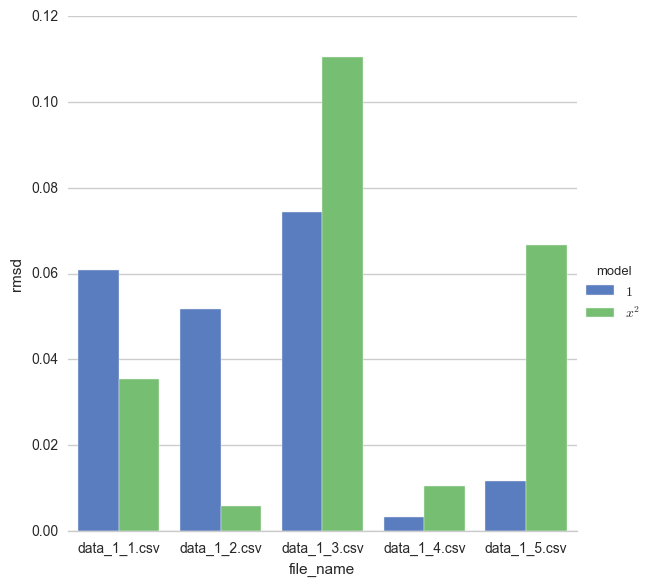

In [72]:
df = pd.DataFrame(metrics).sort('file_name')

import seaborn as sns
sns.set(style="whitegrid")


# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="file_name", y="rmsd", hue="model", data=df,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("rmsd")            

## Results

In [62]:
results = []
for item in results_square:
    result = {k: np.mean([e[k] for e in item.trace]) for k in item.trace[0].keys()}
    result['file_name'] = item.file_name
    result['ct'] = 100 if item.file_name in ['data_1_1.csv', 'data_1_2.csv'] else 50
    results.append(result)

df_results = pd.DataFrame(results)
df_results.head(10)

,a,b,ct,file_name,nu,nu_interval_,w,w_interval_
0,1.033639,0.005087,100,data_1_1.csv,4.088898,-0.722434,0.243841,-3.729304
1,1.250717,-0.554186,100,data_1_2.csv,2.656124,-1.679034,0.157571,-4.188483
2,-0.665783,0.135664,50,data_1_3.csv,2.971437,-1.505920,0.159151,-4.211145
3,1.002800,0.522109,50,data_1_4.csv,6.328168,0.580047,0.187357,-3.996737
4,-0.964518,-0.087334,50,data_1_5.csv,3.781542,-1.002638,0.200360,-3.983863
